__Problem Statement__

Understanding and predicting weight changes is a complex task influenced by various lifestyle, physiological, and environmental factors. Despite popular focus on calorie intake and physical activity, factors such as sleep quality, stress levels, and basal metabolic rate (BMR) also play significant roles in weight fluctuation.

The objective of this project is to develop a predictive model that accurately forecasts weight change over a specified duration, based on multiple influencing variables. By analyzing these factors and identifying key predictors, the model can provide actionable insights to help individuals and healthcare professionals better understand weight management and design personalized intervention strategies.

Specifically, this project aims to:

* Identify and quantify the primary factors influencing weight change, such as caloric intake, activity level, sleep quality, and stress levels.
* Develop a predictive model with high accuracy that explains the variance in weight change over time.
* Generate actionable insights to guide individuals toward healthier lifestyle choices.

* __Participant ID:__ Unique identifier for each participant in the study.
* __Age:__ The age of the participant (in years), which can influence metabolism and weight change.
* __Gender:__ Gender of the participant (M/F), as physiological differences may affect weight management.
* __Current Weight (lbs):__ The participant's weight at the beginning of the study, serving as a baseline for weight change.
* __BMR (Calories)__: Basal Metabolic Rate, calculated using the Mifflin-St Jeor equation, representing the number of calories burned at rest.
* __Daily Calories Consumed:__ Total caloric intake per day, including variability to reflect real-world eating habits.
* __Daily Caloric Surplus/Deficit:__ The difference between calories consumed and BMR, indicating whether the participant is in a caloric surplus or deficit.
* __Weight Change (lbs):__ The estimated change in weight over a specified duration, based on caloric surplus/deficit.
* __Duration (weeks):__ The time period over which weight change is measured, ranging from 1 to 12 weeks.
* __Physical Activity Level:__ Self-reported level of physical activity, categorized as Sedentary, Lightly Active, Moderately Active, or Very Active.
* __Sleep Quality:__ Self-reported quality of sleep, categorized as Poor, Fair, Good, or Excellent, which can affect weight management.
* __Stress Level:__ A numerical score (1-10) indicating the participant's perceived stress level, as stress can influence eating behaviors and weight.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Expolaratory Data Analysis and Preprocessing

In [2]:
df = pd.read_csv('weight_change_dataset.csv')
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [4]:
df.isnull().sum()

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64

In [5]:
# Useless to our analysis and model
df.drop(columns=['Participant ID'], inplace = True)

We have done some feature engineering and created three new columns Caloric Intake Per Weight, Physical Activity MET Value, and Activity Weighted Calories.

In [6]:
# created a new column Caloric Intake Per Weight using Daily Calories Consumed and Current Weight (lbs)
df['Caloric Intake Per Weight']  = df['Daily Calories Consumed'] / df['Current Weight (lbs)'] 


The MET (Metabolic Equivalent of Task) value is a unit used to estimate the amount of energy expended during various physical activities. It provides a way to compare the intensity of activities and is defined as the ratio of the work metabolic rate to the resting metabolic rate.\
To calculate activity-weighted calories first we need to convert the Physical Activity Level to a MET value then use the BMR (Basal Metabolic Rate) and MET value to calculate the calories burned.

In [7]:
# mapping of common activities to their respective MET values
met_value_map = {
    'Sedentary' : 1.2,
    'Very Active' : 1.9,
    'Lightly Active' : 1.375,
    'Moderately Active' : 1.55
}
# here we have applied the mapping on the Physical Activity Level and created new colum for MET values
df['Physical Activity MET Value'] = df['Physical Activity Level'].map(met_value_map)
# using MET value and BMR we have calculated and created a new column Activity Weighted Calories
df['Activity Weighted Calories'] = df['Physical Activity MET Value'] * df['BMR (Calories)']

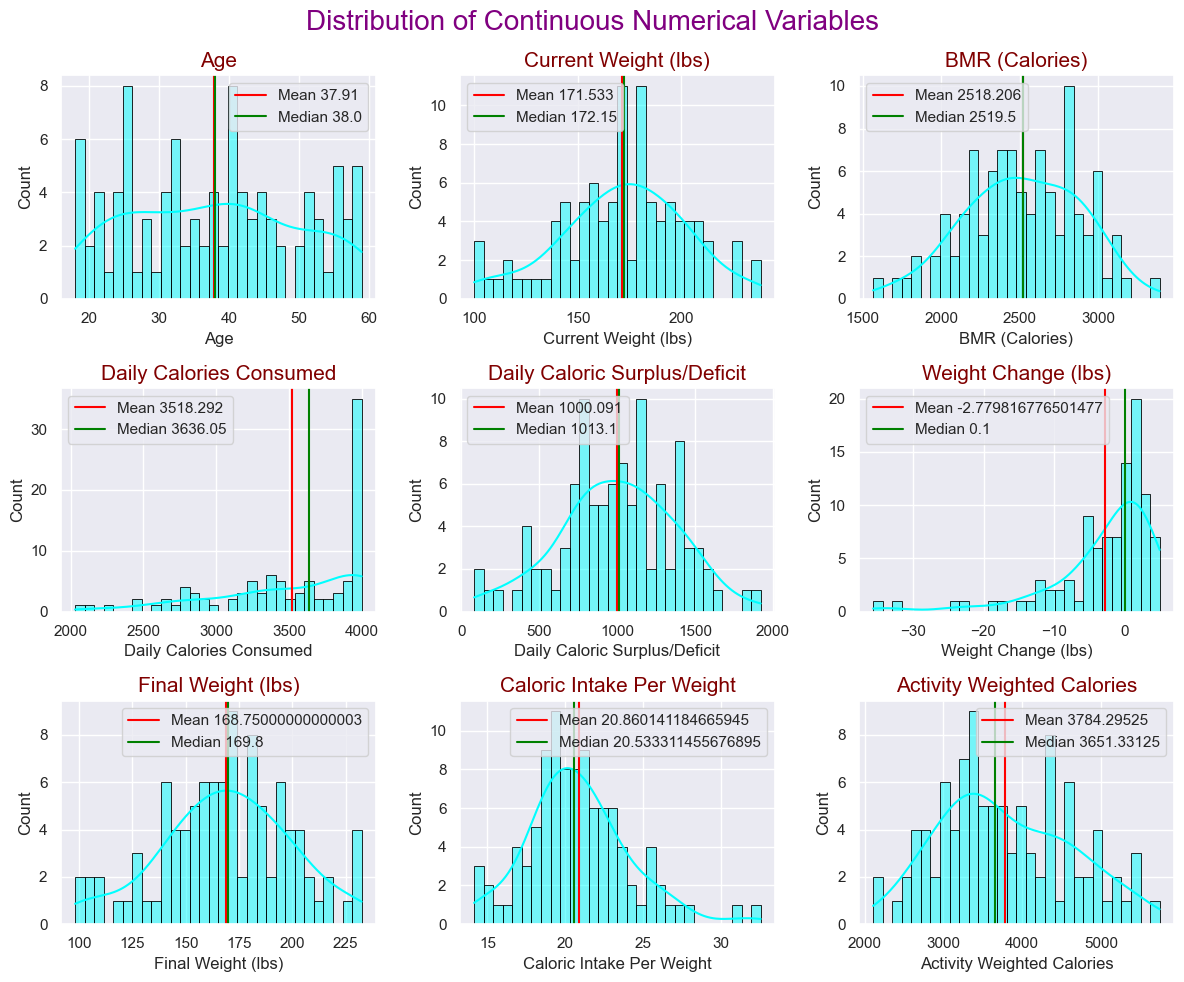

In [8]:

# I have added two more continuos colums
continous_num_cols = ['Age', 'Current Weight (lbs)', 'BMR (Calories)',
        'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit',
       'Weight Change (lbs)', 'Final Weight (lbs)', 'Caloric Intake Per Weight', 'Activity Weighted Calories']
plt.figure(figsize = (12, 10))
pt = 1

for col in continous_num_cols:
    plt.subplot(3,3, pt)
    sns.histplot(df[col], kde = True, bins = 30, color = 'cyan', edgecolor = 'black')
    plt.axvline(df[col].mean(), label = f'Mean {df[col].mean()}', color = 'red')
    plt.axvline(df[col].median(), label = f'Median {df[col].median()}', color = 'green')
    plt.title(col, fontsize = 15, color = 'maroon')
    plt.legend()
    pt+=1
    

plt.suptitle('Distribution of Continuous Numerical Variables', fontsize=20, color='purple')
plt.tight_layout()
plt.show()

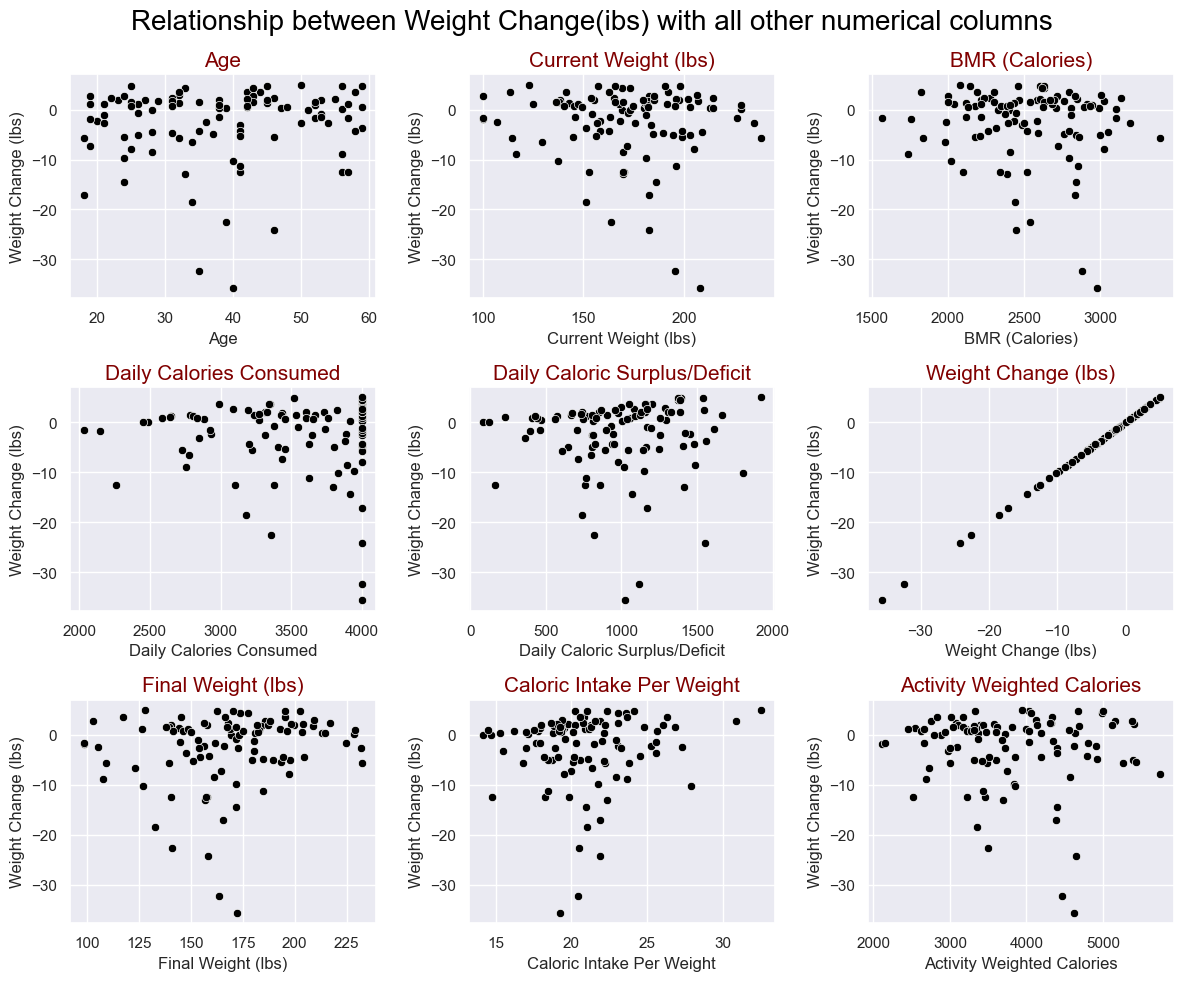

In [9]:

# I have added two more continuos colums
continous_num_cols = ['Age', 'Current Weight (lbs)', 'BMR (Calories)',
        'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit',
       'Weight Change (lbs)', 'Final Weight (lbs)', 'Caloric Intake Per Weight', 'Activity Weighted Calories']
plt.figure(figsize = (12, 10))
pt = 1

for col in continous_num_cols:
    plt.subplot(3,3, pt)
    sns.scatterplot(x = col, y = 'Weight Change (lbs)', data=df, color = 'black', edgecolor = 'white')
    plt.title(col, fontsize = 15, color = 'maroon')
    pt+=1
    
plt.suptitle('Relationship between Weight Change(ibs) with all other numerical columns', fontsize=20, color='black')
plt.tight_layout()
plt.show()

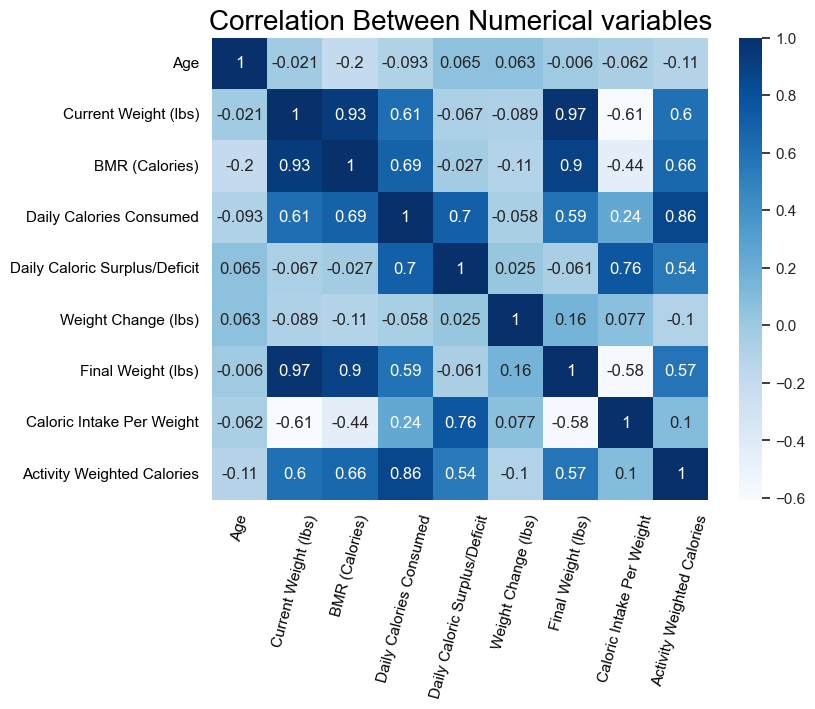

In [10]:
plt.figure(figsize = (8, 6))
correlation = df[continous_num_cols].corr()
sns.heatmap(correlation, annot=True, cmap = 'Blues')
plt.title('Correlation Between Numerical variables', fontsize = 20, color = 'black')
plt.xticks(color = 'black', rotation = 75)
plt.yticks(color = 'black')
plt.show()

Explore correlations between features such as Daily Caloric Surplus/Deficit and Weight Change\
A correlation of 0.025 between Daily Caloric Surplus/Deficit and Weight Change suggests a weak positive relationship between the two variables. As the Daily Caloric Surplus/Deficit increases, there is a slight increase in Weight Change.\
A correlation of -0.11 between BMR (calories) and Weight Change indicates a very weak negative relationship between the two variables. As BMR increases, Weight Change tends to slightly decrease.

The features we are analyzing may not have a linear relationship with Weight Change.\
The relationship between Weight Change and other features might be interactive rather than individual. For example, BMR might only influence Weight Change when combined with another variable (like activity level). In such cases, a multiple regression model or machine learning models (e.g., Random Forest, Gradient Boosting) might be more effective.

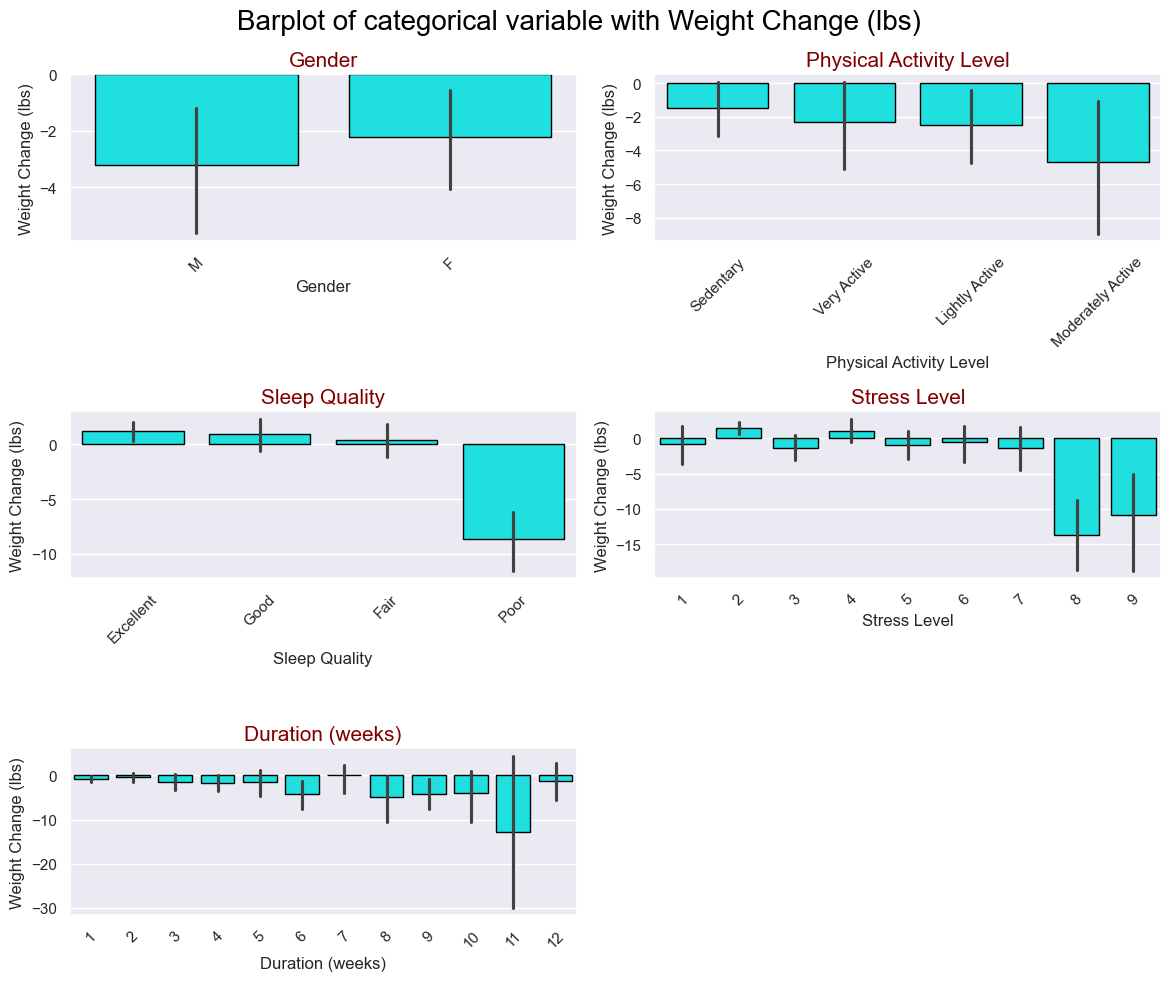

In [11]:
# Visualizing how categorical variables correlating with average Weight Change

cat_cols = ['Gender', 'Physical Activity Level', 'Sleep Quality', 'Stress Level', 'Duration (weeks)']
plt.figure(figsize = (12, 10))
pt = 1
for col in cat_cols:
    plt.subplot(3,2, pt)
    sns.barplot(x = col, y = 'Weight Change (lbs)', data=df, color = 'cyan', edgecolor = 'black')
    plt.xticks(rotation = 45)
    plt.title(col, fontsize = 15, color = 'maroon')
    pt+=1
    
plt.suptitle('Barplot of categorical variable with Weight Change (lbs)', fontsize=20, color='black')
plt.tight_layout()
plt.show()

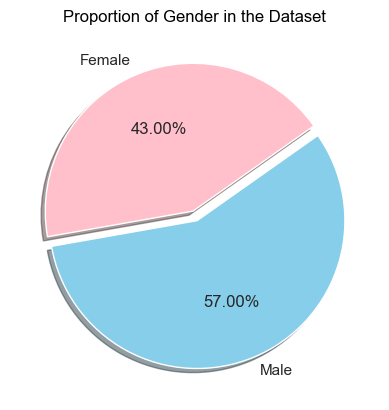

In [12]:
# Visualizing Proportion of Gender in the Dataset
plt.pie(df.Gender.value_counts(), labels=['Male', 'Female'], autopct='%0.2f%%', 
        shadow=True, explode = [0.04, 0.03], startangle=190, colors =['skyblue', 'pink'])
plt.title('Proportion of Gender in the Dataset', color = 'black')
plt.show()

#### Dealing with outliers

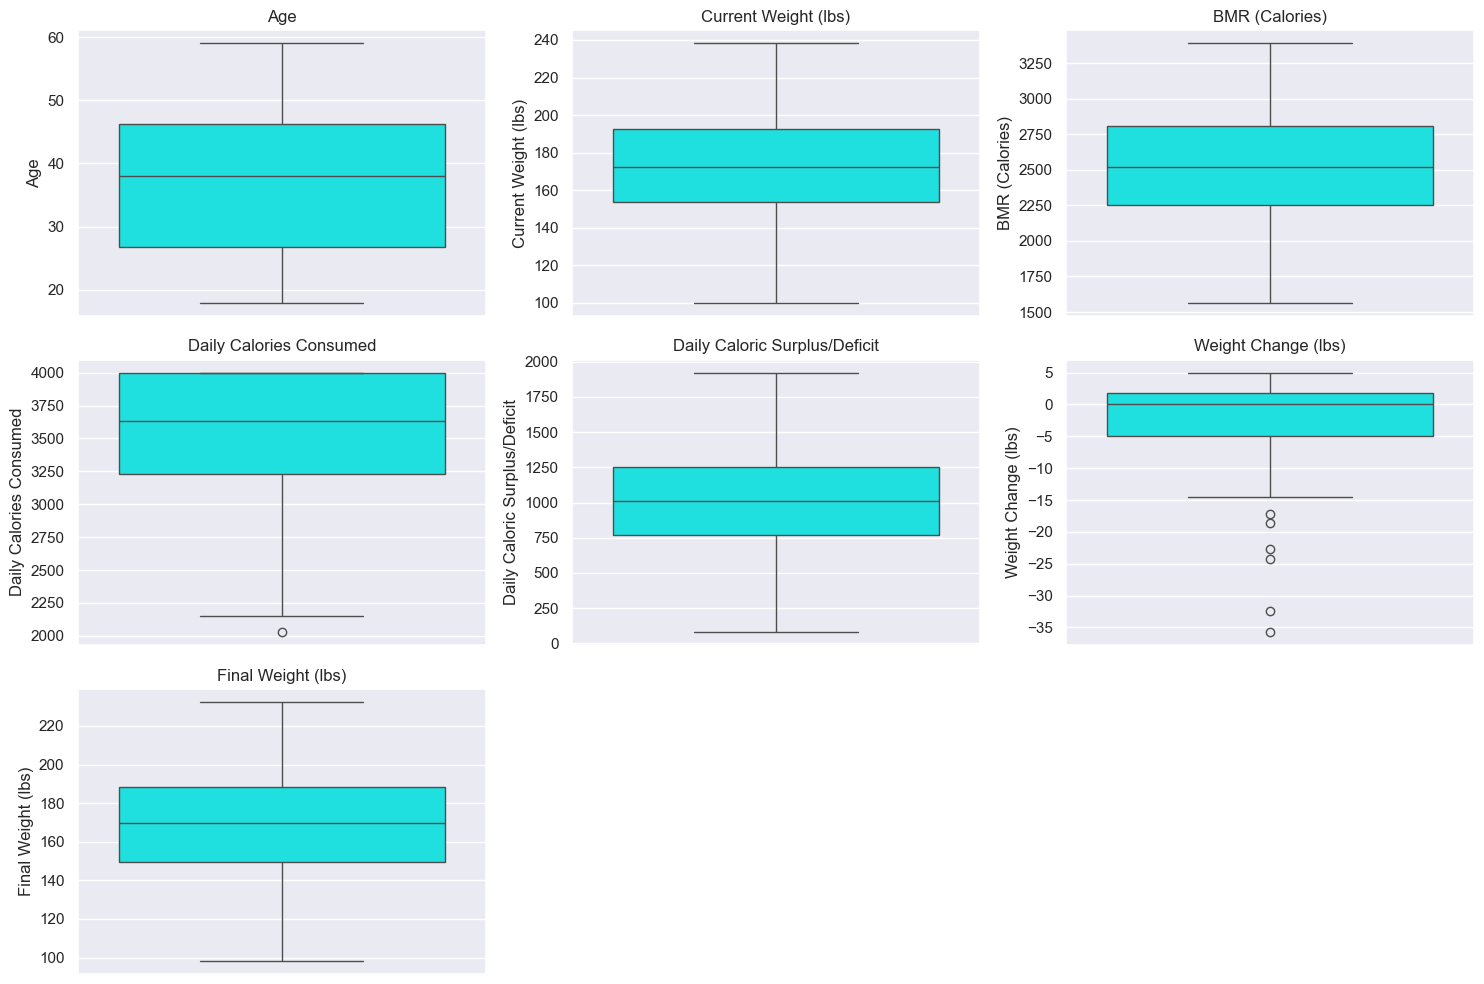

In [13]:
# We are using Box plot to visualize outliers in continuous columns

continous_num_cols = ['Age', 'Current Weight (lbs)', 'BMR (Calories)',
        'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit',
       'Weight Change (lbs)', 'Final Weight (lbs)'] # Duration (weeks) and Stress Level aren't continuous variables

plt.figure(figsize = (15, 10))
pt = 1
for col in continous_num_cols:
    plt.subplot(3, 3, pt)
    sns.boxplot(df[col], color = 'cyan')
    plt.title(col)
    pt+=1

plt.tight_layout()
plt.show()

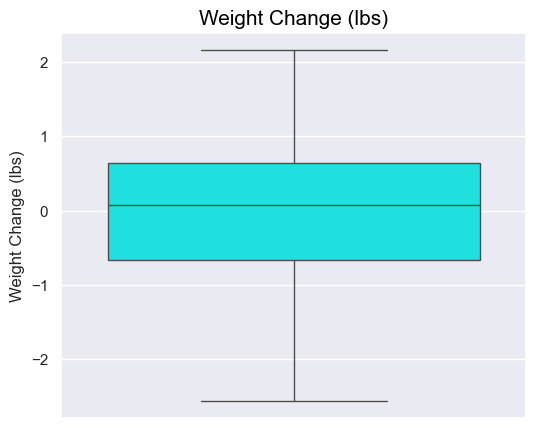

In [14]:
# Weight Changes(ibs) has some outliers.
# so we'll apply Yeo-Johnson transformation to lessen the influence of outliers (extreme values)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['Weight Change (lbs)'] = pt.fit_transform(df[['Weight Change (lbs)']])  

# After transformation
plt.figure(figsize = (6, 5))
sns.boxplot(df['Weight Change (lbs)'], color = 'cyan')
plt.title('Weight Change (lbs)', fontsize=15, color = 'black')
plt.show()


## Model Selection

#### Feature Selection

In the dataset, there were both 'Current Weight' and 'Final Weight' columns. I chose to drop the 'Final Weight' column because my goal was to predict 'Weight Change.' Including 'Final Weight' would have made predicting 'Weight Change' too simple, as it could be calculated directly by subtracting 'Current Weight' from 'Final Weight'. This would not provide any additional value to the model and could lead to redundancy. Additionally, using 'Final Weight' could introduce target leakage, where the model unintentionally gains direct access to information related to the target variable, which could result in overfitting. By removing 'Final Weight', I ensure the model focuses on other predictive features and learns meaningful patterns to predict 'Weight Change'.


To avoid redundancy and ensure the model remains efficient, I decided to drop the 'Caloric Intake Per Weight' feature. This decision was made because it is derived directly from 'Daily Calories Consumed' and 'Current Weight (lbs)', and including it would not provide additional value. I also removed 'Physical Activity Level' and 'BMR (Calories)' as features, because these are already encapsulated in the 'Activity Weighted Calories' feature, thus avoiding duplication and ensuring the model remains lean without losing key information.

In [15]:
data = df.drop(columns=['Caloric Intake Per Weight', 'BMR (Calories)','Physical Activity Level',
                        'Physical Activity MET Value', 'Final Weight (lbs)'])
data.columns

Index(['Age', 'Gender', 'Current Weight (lbs)', 'Daily Calories Consumed',
       'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)',
       'Duration (weeks)', 'Sleep Quality', 'Stress Level',
       'Activity Weighted Calories'],
      dtype='object')

In [16]:
x = data.drop(columns = ['Weight Change (lbs)']) # independent variable
y = data['Weight Change (lbs)'] # dependent variable (target)

In [17]:
# Spliting the dataset for training and testing the model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((80, 9), (20, 9))

In [18]:
# Encoding the categorical columns
cat_cols = ['Gender', 'Sleep Quality']
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
x_train['Gender'] = gender_encoder.fit_transform(x_train['Gender'])
x_test['Gender'] = gender_encoder.transform(x_test['Gender'])

sleep_encoder = LabelEncoder()
x_train['Sleep Quality'] = sleep_encoder.fit_transform(x_train['Sleep Quality'])
x_test['Sleep Quality'] = sleep_encoder.transform(x_test['Sleep Quality'])


In [19]:
x_train.head()

,Age,Gender,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Duration (weeks),Sleep Quality,Stress Level,Activity Weighted Calories
55,23,0,185.0,3327.8,740.8,10,2,3,3104.4000
88,28,1,209.0,4000.0,951.1,10,3,3,4192.2375
26,44,1,191.8,4000.0,1202.9,12,1,1,4335.5050
42,43,1,182.8,4000.0,1287.8,7,2,2,5153.1800
69,40,0,137.2,3827.8,1804.5,9,3,1,3844.2700


In [20]:
# Creating an instance of all regressor models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

mlr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=1)
svr = SVR()
rfr = RandomForestRegressor(random_state=1)
xgb = XGBRegressor()
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

In [21]:
mod = {'Multi-Linear Regressor': mlr, 
       'Decision Tree Regressor': dtr, 
       'Support Vector Regressor': svr, 
       'Random Forest Regressor': rfr, 
       'XGB Regressor': xgb, 
       'KNN Regressor': knn,
       'Gradient Boosting Regressor' : gbr,
       'AdaBoost Regressor': abr}


In [22]:
# Training and Evaluating the all the models at once
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

all_models = {}
for name, reg in mod.items():
    model = reg.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1- score )* (x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] -1))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    all_models[name] = score, adj_r2, mae, mse, rmse
    

## Model Evaluation

In [23]:
# Compare all model's metrices
pd.DataFrame(all_models, index = ['R2-Score', 'Adjusted R2-Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])


,Multi-Linear Regressor,Decision Tree Regressor,Support Vector Regressor,Random Forest Regressor,XGB Regressor,KNN Regressor,Gradient Boosting Regressor,AdaBoost Regressor
R2-Score,0.242713,0.898584,0.041605,0.903197,0.906328,-0.300782,0.869573,0.861078
Adjusted R2-Score,-0.438845,0.807311,-0.820951,0.816075,0.822022,-1.471486,0.752188,0.736048
Mean Absolute Error,0.481131,0.195354,0.629212,0.198354,0.182008,0.797495,0.220751,0.246961
Mean Squared Error,0.473570,0.063420,0.599334,0.060536,0.058578,0.813446,0.081563,0.086875
Root Mean Squared Error,0.688164,0.251834,0.774167,0.246040,0.242029,0.901912,0.285592,0.294746


__Insights:__ \
From the performance metrics of different models, the XGB Regressor stands out as the best performer. Its R² score (0.906) is the highest among the models before optimization, suggesting it explains a significant proportion of the variance in the target variable, 'Weight Change.'

In [24]:
# Best model out of them 
best_model = XGBRegressor()
print('------Performance before Optimization------')
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
score = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1- score )* (x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] -1))
print('R2- score:', score)
print('Adjusted R2 score', adj_r2)

------Performance before Optimization------
R2- score: 0.9063275105765944
Adjusted R2 score 0.8220222700955294


__Insights:__ \
An R² of 0.906 suggests the model explains a high portion of the variance in the target variable. This is generally a good result and indicates a strong fit on the data.\
However, the Adjusted R² is significantly lower at 0.822, suggesting that some features may be adding complexity without improving predictive power. This gap could imply some level of overfitting, which additional tuning might help address.

In [25]:
# Feature importance 
print(best_model.feature_importances_ * 100)

[2.6005018e-01 3.2758154e-02 7.8712982e-01 6.4516008e-02 2.4314947e+00
 4.5347409e+00 7.6898155e+01 1.4628119e+01 3.6304629e-01]


In [26]:
eval = pd.DataFrame(x_train.columns.to_list(), columns = ['Features'])
eval['Importance %'] = best_model.feature_importances_ * 100
eval.sort_values(by = 'Importance %', ascending=False)

,Features,Importance %
6,Sleep Quality,76.898155
7,Stress Level,14.628119
5,Duration (weeks),4.534741
4,Daily Caloric Surplus/Deficit,2.431495
2,Current Weight (lbs),0.787130
8,Activity Weighted Calories,0.363046
0,Age,0.260050
3,Daily Calories Consumed,0.064516
1,Gender,0.032758


__Insights:__ \
Before optimization, 'Sleep Quality' was the most important feature (76.9%), followed by 'Stress Level' (14.6%), indicating strong influences on weight change. 'Duration (weeks)' (4.5%) and 'Daily Caloric Surplus/Deficit' (2.4%) also played a role. 'Current Weight (lbs)' (0.79%) and 'Activity Weighted Calories' (0.36%) had low importance, while 'Age' and 'Gender' (0.03% and 0.26%) contributed minimally, suggesting they had little predictive value for weight change.

## Optimization

#### Remove Complexity to Reduce Overfitting

The removal of 'Age' and 'Gender' was a good decision based on their low feature importance. Dropping these features likely simplified the model, preventing overfitting and improving computational efficiency without sacrificing predictive power.

In [27]:
# Optimizing by removing the features which add little to predictive power of the model because it increases 
# unnecessary complexity and overfitting (to reduce the difference between adjusted r2 score and adjusted r2 score)

x_train = x_train.drop(columns = ['Age', 'Gender'])
x_test = x_test.drop(columns = ['Age', 'Gender'])

#### Hyperparameter Tuning

In [28]:
# Optimizing the model with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.05, 0.2],
    'max_depth' : [3, 4, 5],
    'subsample' : [0.08, 0.9, 1.0],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1,2,4]
}

gbr = XGBRegressor()

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.08, 0.9, 1.0]},
             verbose=3)

In [29]:
# Best parameter to train the model
grid_search.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.9}

#### Training on Tuned Hyperparameter

In [30]:
optimized_model = XGBRegressor(learning_rate= 0.05, max_depth= 5,min_samples_leaf= 1, min_samples_split= 2,
                          n_estimators= 100, subsample= 0.9)
optimized_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, min_samples_leaf=1, min_samples_split=2,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=100, n_jobs=None, ...)

In [31]:
# prediction on training dataset
y_pred_tuned = optimized_model.predict(x_train)
# Evaluate the model on training data
score = r2_score(y_train, y_pred_tuned)
adj_r2 = 1 - ((1- score )* (x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] -1))
mae = mean_absolute_error(y_train, y_pred_tuned)
mse = mean_squared_error(y_train, y_pred_tuned)
rmse = np.sqrt(mse)

print('------Performance after Hyperparameter Tuning in Training the Model------')
print('R2 score:', score)
print('Adjusted R2 score', adj_r2)
print('Mean Squared Error:', mae)
print('Mean Absolute Error:', mse)
print('Root-Mean Squared Error:', rmse)

------Performance after Hyperparameter Tuning in Training the Model------
R2 score: 0.998208904003007
Adjusted R2 score 0.998034769669966
Mean Squared Error: 0.02892374721793971
Mean Absolute Error: 0.001954104816832053
Root-Mean Squared Error: 0.044205257796240176


#### Testing the Optimized model

In [32]:
y_pred_tuned = optimized_model.predict(x_test)
# Evaluate the model on testing data
score = r2_score(y_test, y_pred_tuned)
adj_r2 = 1 - ((1- score )* (x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] -1))
mae = mean_absolute_error(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)

print('------Performance after Hyperparameter Tuning in testing the model------')
print('R2 score:', score)
print('Adjusted R2 score', adj_r2)
print('Mean Squared Error:', mae)
print('Mean Absolute Error:', mse)
print('Root-Mean Squared Error:', rmse)

------Performance after Hyperparameter Tuning in testing the model------
R2 score: 0.9436407374724254
Adjusted R2 score 0.9107645009980069
Mean Squared Error: 0.14152646899190008
Mean Absolute Error: 0.03524433918953883
Root-Mean Squared Error: 0.18773475754249352


__Insights:__
* R² Score: 0.9436 — The R² has significantly improved after hyperparameter tuning, suggesting that the model is now explaining over 94% of the variance in 'Weight Change'. This is a major improvement, indicating that the optimization has made the model more robust and accurate.
* Adjusted R² Score: 0.9108 — This increase in Adjusted R² after tuning also indicates that the model is not just overfitting but improving its generalization ability as well.
* MAE: 0.0352 — The MAE has decreased significantly after optimization, suggesting that the model’s predictions are even closer to the true values.
* MSE and RMSE have also reduced significantly, further confirming the improved prediction accuracy and the reduction in errors after optimization.

In [33]:
eval = pd.DataFrame(x_train.columns.to_list(), columns = ['Features'])
eval['Importance %'] = optimized_model.feature_importances_ * 100
eval = eval.sort_values(by = 'Importance %', ascending=False)
eval

,Features,Importance %
4,Sleep Quality,75.190964
5,Stress Level,14.774405
3,Duration (weeks),4.323884
2,Daily Caloric Surplus/Deficit,3.914852
0,Current Weight (lbs),0.661938
6,Activity Weighted Calories,0.624783
1,Daily Calories Consumed,0.509172


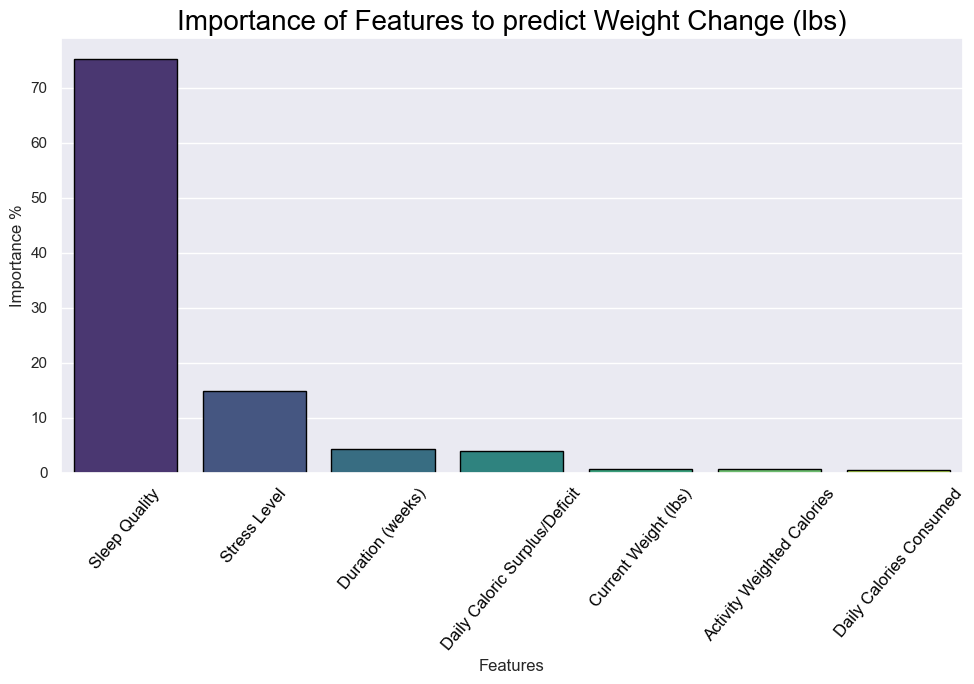

In [34]:
# Visualization
plt.figure(figsize=(10, 7))
sns.barplot(x = eval['Features'], y = eval['Importance %'], palette = 'viridis', edgecolor = 'black')
plt.title('Importance of Features to predict Weight Change (lbs)', fontsize=20, color = 'black')
plt.xticks(rotation = 50, color= 'black', fontsize = 12)
plt.tight_layout()
plt.show()

__Insights__ \
To
To optimize weight change and management, focus on improving sleep quality and managing stress. 
Regular exercise and maintaining a healthy caloric balance will also be crucial for achieving sustainable 
weight loss or maintenance. Regularly track progress over weeks and adjust habits as needed for optimal 
results.

In [35]:
# function to predict the weight change in the original scale
def predict_weight_change(data):
    pred = optimized_model.predict(data)
    # inverse transform the prediction to the original scale
    original_pred = pt.inverse_transform(pred.reshape(-1, 1))
    return original_pred
    

In [36]:
actual = pt.inverse_transform(y_test.to_numpy().reshape(-1, 1))
review = pd.DataFrame(actual, columns = ['Actual Value'])
review['Predicted'] = predict_weight_change(x_test)
review

,Actual Value,Predicted
0,1.200000,1.005277
1,-1.135826,-4.450685
2,-1.658347,-4.982127
3,4.800000,4.448138
4,-4.988028,-4.739583
5,3.600000,3.086284
6,-2.623361,-3.521800
7,-5.718496,-4.470036
8,-5.028299,-4.687112
9,0.200000,0.592543


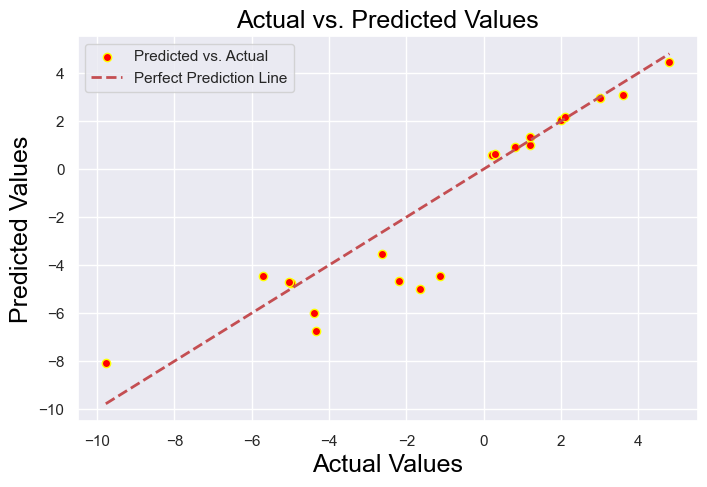

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(review['Actual Value'], review['Predicted'], color='red', label='Predicted vs. Actual', edgecolor='yellow')
plt.plot([review['Actual Value'].min(), review['Actual Value'].max()], [review['Actual Value'].min(), review['Actual Value'].max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values', color = 'black', fontsize=18)
plt.ylabel('Predicted Values', color = 'black', fontsize=18)
plt.title('Actual vs. Predicted Values', color = 'black', fontsize=18)
plt.legend()
plt.show()

#### Dump the neccessary objects

In [38]:
import pickle 

# Dumping the gender encoder
pickle.dump(gender_encoder, open('gender_encoder.pkl', 'wb'))
# Dumping the sleep quality encoder
pickle.dump(sleep_encoder, open('sleep_encoder.pkl', 'wb'))
# Dumping the model
pickle.dump(optimized_model, open('model.pkl', 'wb'))
# Dumping the tranformator
pickle.dump(pt, open('transformator.pkl', 'wb'))
